**IMPORT LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


%matplotlib inline

**LOAD** **DATASET**

In [ ]:
model = pd.read_csv('/content/test.csv')

**PRINT FIRST 5 ROWS OF DATASET**

In [ ]:
model.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE
0,Owner,0.0,0.0,1.0,BHK,545.171340,1.0,1.0,"Kamrej,Surat",21.262000,73.047700
1,Dealer,1.0,1.0,2.0,BHK,800.000000,0.0,0.0,"Panvel,Lalitpur",18.966114,73.148278
2,Dealer,0.0,0.0,2.0,BHK,1257.096513,1.0,1.0,"New Town,Kolkata",22.592200,88.484911
3,Dealer,0.0,0.0,3.0,BHK,1400.329489,1.0,1.0,"Kalwar Road,Jaipur",26.988300,75.584600
4,Owner,0.0,0.0,1.0,BHK,430.477830,1.0,1.0,"Mai Mandir,Nadiad",22.700000,72.870000


**SUMMARIZE THE NUMERICAL DATA IN OUR DATASET**

In [ ]:
model.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE
count,28071.000000,28071.000000,28071.000000,2.807100e+04,28071.000000,28071.000000,28071.000000,28071.000000
mean,0.176054,0.315984,2.385843,2.140706e+03,0.823946,0.931780,21.326982,76.965640
std,0.380873,0.464915,0.872122,4.145185e+04,0.380873,0.252127,6.150141,9.694067
min,0.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,-37.781776,-117.001699
25%,0.000000,0.000000,2.000000,9.000000e+02,1.000000,1.000000,18.465312,73.795537
50%,0.000000,0.000000,2.000000,1.171717e+03,1.000000,1.000000,21.000000,77.324966
75%,0.000000,1.000000,3.000000,1.550152e+03,1.000000,1.000000,26.900926,77.940853
max,1.000000,1.000000,20.000000,6.302532e+06,1.000000,1.000000,65.183330,175.278040


**GIVE INFORMATION OF DATASET**

In [ ]:
model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28072 entries, 0 to 28071
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   POSTED_BY           28072 non-null  object 
 1   UNDER_CONSTRUCTION  28071 non-null  float64
 2   RERA                28071 non-null  float64
 3   BHK_NO.             28071 non-null  float64
 4   BHK_OR_RK           28071 non-null  object 
 5   SQUARE_FT           28071 non-null  float64
 6   READY_TO_MOVE       28071 non-null  float64
 7   RESALE              28071 non-null  float64
 8   ADDRESS             28071 non-null  object 
 9   LONGITUDE           28071 non-null  float64
 10  LATITUDE            28071 non-null  float64
dtypes: float64(8), object(3)
memory usage: 2.4+ MB


**GIVES NUMBER OF ROWS AND COLUMNS**

In [ ]:
model.shape

(28072, 11)

**HISTOGRAM OF THE BHK_NO.**

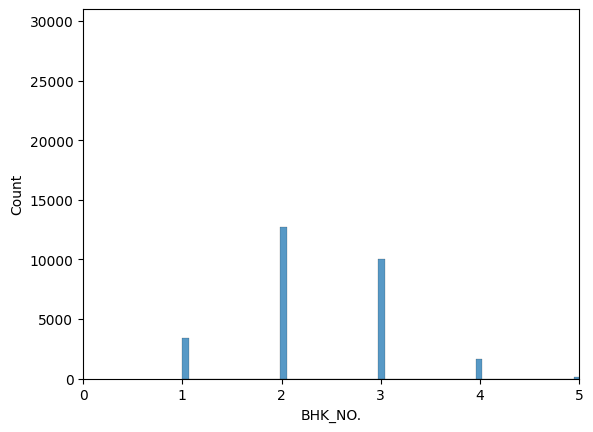

In [ ]:
sns.histplot(model['BHK_NO.'])
plt.xlim(0, 5)
plt.ylim(0, 31000)
plt.show()

**HEATMAP OF THE CORRELATION MATRIX OF THE DATAFRAME**



<ipython-input-11-f10b1419f4ba>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(model.corr(),


<Axes: >

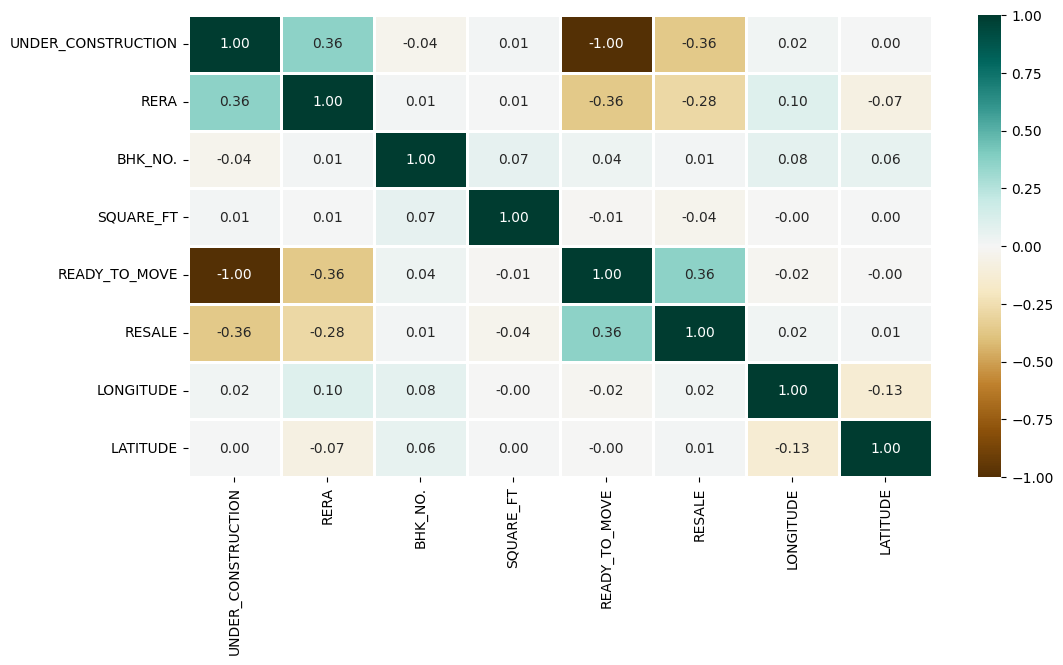

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(model.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

**MODEL ANALYSIS BETWEEN DIFFERENT ATTRIBUTES**


In [ ]:
import pandas as pd

model_analysis = model[(model['BHK_NO.'] > 5) & (model["SQUARE_FT"] > 5000) & (model['POSTED_BY']=='Owner')]

print(model_analysis)
model_analysis.count()

      POSTED_BY  UNDER_CONSTRUCTION  RERA  BHK_NO. BHK_OR_RK     SQUARE_FT  \
1831      Owner                 0.0   0.0     12.0       BHK  7.500852e+03   
6620      Owner                 0.0   0.0     10.0       BHK  8.403361e+03   
7732      Owner                 0.0   0.0      7.0       BHK  5.345688e+03   
17321     Owner                 0.0   0.0      8.0       BHK  7.815408e+03   
21214     Owner                 0.0   0.0     11.0       BHK  6.302532e+06   
21386     Owner                 0.0   0.0      8.0       BHK  5.691769e+03   
27918     Owner                 1.0   0.0     20.0       BHK  1.229656e+04   

       READY_TO_MOVE  RESALE                                          ADDRESS  \
1831             1.0     1.0  Mahendra hills , Annapurna Society,Secunderabad   
6620             1.0     1.0              Sambalpu-Jharsuguda Hiway,Sambalpur   
7732             1.0     1.0                                Kodathi,Bangalore   
17321            1.0     1.0                      C

POSTED_BY             7
UNDER_CONSTRUCTION    7
RERA                  7
BHK_NO.               7
BHK_OR_RK             7
SQUARE_FT             7
READY_TO_MOVE         7
RESALE                7
ADDRESS               7
LONGITUDE             7
LATITUDE              7
dtype: int64

In [ ]:
target_word = 'Delhi'
model_state= model[model['ADDRESS'].str.contains(target_word, case=False)]

print(model_state)
model_state.count()

ValueError: ignored

In [ ]:
import pandas as pd
target_word = 'Delhi'
model_state= model[model['ADDRESS'].str.contains(target_word, case=False)]

model_analysis = model[(model['BHK_NO.'] > 1) & (model["SQUARE_FT"] > 500) & (model['POSTED_BY']=='Owner') & (model['ADDRESS'].str.contains('Delhi', case=False))]

print(model_analysis )
model_analysis.count()

ValueError: ignored